# Compare norms

In [1]:
import sys; sys.path.append('../..')
from abslithist import *
from abslithist.words import *
import plotnine as p9
from scipy import stats
p9.options.figure_size=(9,7)

In [2]:
# get norms
dforig = get_orignorms()
dfnorms=get_allnorms()
dfnorms

,Abs-Conc.LSN-Hapt.C16,Abs-Conc.LSN-Imag.C16,Abs-Conc.MRC-Conc.C16,Abs-Conc.MRC-Imag.C16,Abs-Conc.MT-Conc.C16,Abs-Conc.Median.C16,Abs-Conc.PAV-Conc.C16,Abs-Conc.PAV-Imag.C16,Woman-Man.MultiWords.C16,Woman-Man.SingleWords.C16,...,Woman-Man.MultiWords.median,Woman-Man.SingleWords.median,Abs-Conc.LSN-Hapt.orig,Abs-Conc.LSN-Imag.orig,Abs-Conc.MRC-Conc.orig,Abs-Conc.MRC-Imag.orig,Abs-Conc.MT-Conc.orig,Abs-Conc.PAV-Conc.orig,Abs-Conc.PAV-Imag.orig,Abs-Conc.Median.orig
word,,,,,,,,,,,,,,,,,,,,,
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.950954,NaN,NaN,0.950954
Inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.584783,NaN,NaN,-1.584783
a'ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.418551,-0.125754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a'mighty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.142147,0.058400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a'most,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.042655,0.385595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ụyr,0.745248,0.997725,1.068004,1.047236,1.239472,1.053688,0.980814,0.913027,0.474295,0.348251,...,0.474295,0.348251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0.089321,0.313425,0.556062,0.601238,0.731799,0.466266,0.523841,0.490556,1.554659,0.983228,...,1.789424,2.529038,0.425815,-1.596155,NaN,NaN,NaN,NaN,NaN,-0.585170
NaN,-0.887439,-0.709960,-1.086186,-1.461905,-0.541671,-0.818847,-1.208810,-1.571907,-1.894937,-1.091427,...,-0.481080,-0.430044,0.425815,-1.596155,NaN,NaN,NaN,NaN,NaN,-0.585170


In [3]:
# get words
import lltk
mfw=lltk.load('eebo_tcp').mfw_df(
    yearbin=100,
    year_min=1500,
    year_max=1700,
    keep_periods=True,
    remove_stopwords=True,
#     only_pos={'nn1'}
).append(lltk.load('ecco_tcp').mfw_df(
    keep_periods=True,
    remove_stopwords=True,
#     only_pos={'nn1'},
)).append(lltk.load('coha').mfw_df(
    yearbin=100,
    year_min=1800,
    year_max=2000,
    keep_periods=True,
    remove_stopwords=True,
#     only_pos={'nn1'},
))
mfw=mfw.groupby(['word','pos','pos0']).median().reset_index().set_index('word').query('fpm>=1')
mfw

[EEBO_TCP] Loading MFW from ~/lltk_data/corpora/eebo_tcp/data/mfw/edd4cb13eda1.ft
[ECCO_TCP] Loading MFW from ~/lltk_data/corpora/ecco_tcp/data/mfw/880dfae465c6.ft
[COHA] Loading MFW from ~/lltk_data/corpora/coha/data/mfw/82bbc23fd1e3.ft


,pos,pos0,count,fpm,rank
word,,,,,
a,at,a,2543573.0,18530.700270,6.0
abandon,vv0,v,2406.0,15.052932,5325.0
abandoned,vvn,v,3140.0,28.774700,3104.0
abandoning,vvg,v,405.0,2.118176,17018.0
abashed,jj,j,380.0,1.781425,20868.0
...,...,...,...,...,...
zephyrs,nn2,n,399.0,3.740992,13407.0
zero,mc,m,1708.5,8.073660,11276.5
zone,nn1,n,831.0,6.005020,9973.0


In [4]:
# Combine
mfwnorms=mfw.join(dfnorms)
words_in_pav = dfnorms[~dfnorms['Abs-Conc.PAV-Conc.orig'].isna()]
mfwnorms_wo_pav = mfwnorms.loc[[w for w in mfwnorms.index if w not in set(words_in_pav.index)]]
mfwnorms_wo_pav

,pos,pos0,count,fpm,rank,Abs-Conc.LSN-Hapt.C16,Abs-Conc.LSN-Imag.C16,Abs-Conc.MRC-Conc.C16,Abs-Conc.MRC-Imag.C16,Abs-Conc.MT-Conc.C16,...,Woman-Man.MultiWords.median,Woman-Man.SingleWords.median,Abs-Conc.LSN-Hapt.orig,Abs-Conc.LSN-Imag.orig,Abs-Conc.MRC-Conc.orig,Abs-Conc.MRC-Imag.orig,Abs-Conc.MT-Conc.orig,Abs-Conc.PAV-Conc.orig,Abs-Conc.PAV-Imag.orig,Abs-Conc.Median.orig
word,,,,,,,,,,,,,,,,,,,,,
a,at,a,2543573.0,18530.700270,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abandon,vv0,v,2406.0,15.052932,5325.0,-1.071739,-1.577416,-1.583005,-1.249562,-1.708694,...,0.034125,-0.450508,-0.822187,-0.768556,NaN,-0.493132,-0.420514,NaN,NaN,-0.630844
abandoned,vvn,v,3140.0,28.774700,3104.0,-0.964402,-0.958172,-1.128236,-0.890070,-1.390489,...,0.542238,0.382806,-1.082577,-0.095131,NaN,NaN,-0.440248,NaN,NaN,-0.440248
abandoning,vvg,v,405.0,2.118176,17018.0,-0.964483,-1.049491,-1.363750,-0.940141,-1.569239,...,0.384503,0.177448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abashed,jj,j,380.0,1.781425,20868.0,-0.401029,-0.583668,-0.201802,0.087879,-0.532413,...,1.092425,0.779714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zephyrs,nn2,n,399.0,3.740992,13407.0,NaN,NaN,NaN,NaN,NaN,...,1.769084,1.068746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero,mc,m,1708.5,8.073660,11276.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zone,nn1,n,831.0,6.005020,9973.0,0.674326,0.812435,0.430550,0.464750,0.489510,...,0.429737,0.439294,-0.476189,0.153744,-0.385623,-0.155422,0.102420,NaN,NaN,-0.155422


## Plot

In [5]:
def corstr(df,x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x], df[y])
#     title=f'''{x.replace("Abs-Conc.",'')} ~ {y.replace("Abs-Conc.",'')} (R^2={round(r_value**2,2)}, p={round(p_value,4)}, n={len(df):,})'''
    title=f'''Psycholinguistic ~ Computational concreteness (R^2={round(r_value**2,2)}, p={round(p_value,4)}, n={len(df):,})'''
    return title

In [6]:
dfnorms[[x for x in dfnorms.columns if 'C18' in x]]

,Abs-Conc.LSN-Hapt.C18,Abs-Conc.LSN-Imag.C18,Abs-Conc.MRC-Conc.C18,Abs-Conc.MRC-Imag.C18,Abs-Conc.MT-Conc.C18,Abs-Conc.Median.C18,Abs-Conc.PAV-Conc.C18,Abs-Conc.PAV-Imag.C18,Woman-Man.MultiWords.C18,Woman-Man.SingleWords.C18
word,,,,,,,,,,
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a'ch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a'mighty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a'most,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
ụyr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,1.354069,1.262015,1.707893,1.927537,1.702757,1.529840,1.663657,1.829765,1.789424,2.596971
NaN,-1.577240,-1.679961,-1.511238,-1.748088,-1.465312,-1.600299,-1.683323,-1.897991,0.307253,0.066533


In [26]:
y='Abs-Conc.Median.C20'
# x='Abs-Conc.Median.orig'
x='Woman-Man.SingleWords.C20'

figdf[y]=figdf[y]*-1
figdf=dfnorms[[x,y]].join(mfw).dropna()
figdf=figdf.reset_index()
figdf=figdf[~figdf.word.str.endswith('ing')]
colorname='Concretizing change'
figdf[colorname] = figdf[x] - figdf[y]
sizename='Magnitude of change'
figdf[sizename]=abs(figdf[colorname])
shapename='Direction of change'
figdf[shapename]=['De-concretized' if xx>yy else 'Concretized'
                  for xx,yy in zip(figdf[x],figdf[y])]

figdf=figdf[~figdf.word.isin({'tun','cafe','prostitute'})]
figdf

,word,Woman-Man.SingleWords.C20,Abs-Conc.Median.C20,pos,pos0,count,fpm,rank,Concretizing change,Magnitude of change,Direction of change
0,abandon,-0.450508,-1.183442,vv0,v,2406.0,15.052932,5325.0,0.732934,0.732934,De-concretized
1,abandoned,0.119587,-0.120528,vvn,v,3140.0,28.774700,3104.0,0.240115,0.240115,De-concretized
3,abashed,0.779714,-0.450160,jj,j,380.0,1.781425,20868.0,1.229874,1.229874,De-concretized
4,abate,-1.016487,-1.374826,vv0,v,1192.0,11.176097,6321.0,0.358339,0.358339,De-concretized
5,abated,-0.700110,-0.902699,vvn,v,1217.0,8.244564,7139.0,0.202589,0.202589,De-concretized
...,...,...,...,...,...,...,...,...,...,...,...
17112,zenith,-1.066720,0.499501,nn1,n,362.0,3.882086,11750.0,-1.566221,1.566221,Concretized
17113,zephyr,0.500678,1.234982,nn1,n,367.0,3.440963,14150.0,-0.734305,0.734305,Concretized
17114,zone,-0.336357,0.198482,nn1,n,831.0,6.005020,9973.0,-0.534839,0.534839,Concretized
17115,zones,-0.860092,-0.148576,nn2,n,315.0,1.587649,23765.5,-0.711516,0.711516,Concretized


In [30]:
colorconc='#8b0000'
colorabs='#008080'
import numpy as np,pandas as pd


def plot(figdf, x, y, n=250, only_pos={'n','v','j'}, extra={'culture','fathom','human','discovery','energy','station','blood','face','eyes','voice'}):
    p9.options.figure_size=(10,10)
    title=corstr(figdf[figdf.pos0.isin(only_pos)],x,y)
    figdf0=figdf[~figdf.word.isin(extra)]
    figdf0=figdf0[figdf0.pos0.isin(only_pos)].sort_values('rank').head(n=n)
    figdf0outliers = []
#     for xory in [x,y,colorname]:
    for xory in [colorname]:
        figdf0outliers += [figdf0.sort_values(xory).head(50).sample(n=25)]
        figdf0outliers += [figdf0.sort_values(xory).tail(50).sample(n=25)]
    figdf0b = abs(figdf0[y]).head(10)
    figdf1=figdf[figdf.word.isin(extra)]
    figdf=figdf1.append(figdf0).dropna()
#     fig=p9.ggplot(p9.aes(x=x,y=y,label='word',color=colorname),data=figdf)
    fig=p9.ggplot(p9.aes(x=x,y=y,label='word'),data=figdf)
#     fig+=p9.geom_point(p9.aes(size=sizename,shape=shapename),alpha=0.2)#,show_legend=False)
    fig+=p9.geom_point(alpha=0.25)#,show_legend=False)
#     fig+=p9.geom_smooth(se=True,method='lm')
    fig+=p9.geom_label(
        size=9,
        color='black',
        data=figdf1.append(figdf0.sample(n=50)).append(pd.concat(figdf0outliers)),
#         adjust_text={'expand_points':(1,1)}
    )
    
    fig+=p9.labs(title=title)
    fig+=p9.geom_hline(yintercept=0,alpha=0.5)
    fig+=p9.geom_vline(xintercept=0,alpha=0.5)
    fig+=p9.ylim(-2,2)
    fig+=p9.xlim(-2,2)
#     fig+=p9.scale_color_gradient(high=colorconc,low=colorabs)
    fig+=p9.theme_classic()
    fig+=p9.scale_size(range=[1,5])
#     fig+=p9.xlab('Avg. concreteness, according to psycholinguistic studies of C20/C21')
#     fig+=p9.xlab('Gender')
    fig+=p9.ylab('<< Concrete | Abstract >> (C20 model)')
    fig+=p9.xlab('<< "Man" | "Woman" >>')
    fig+=p9.geom_text(label='Average', size=8, x = 0.025, y = -2.1, ha='left')#, ha = 0, va = 1)
    fig+=p9.geom_text(label='Average', size=8, y = .05, x = -2.1, ha='left')#, ha = 0, va = 1)
    return fig

In [28]:
# fig=plot(figdf,x=x,y=y,n=2000)
# fig.save('../../figures/psych-v-comp-norms.v23-C20.png')
# fig

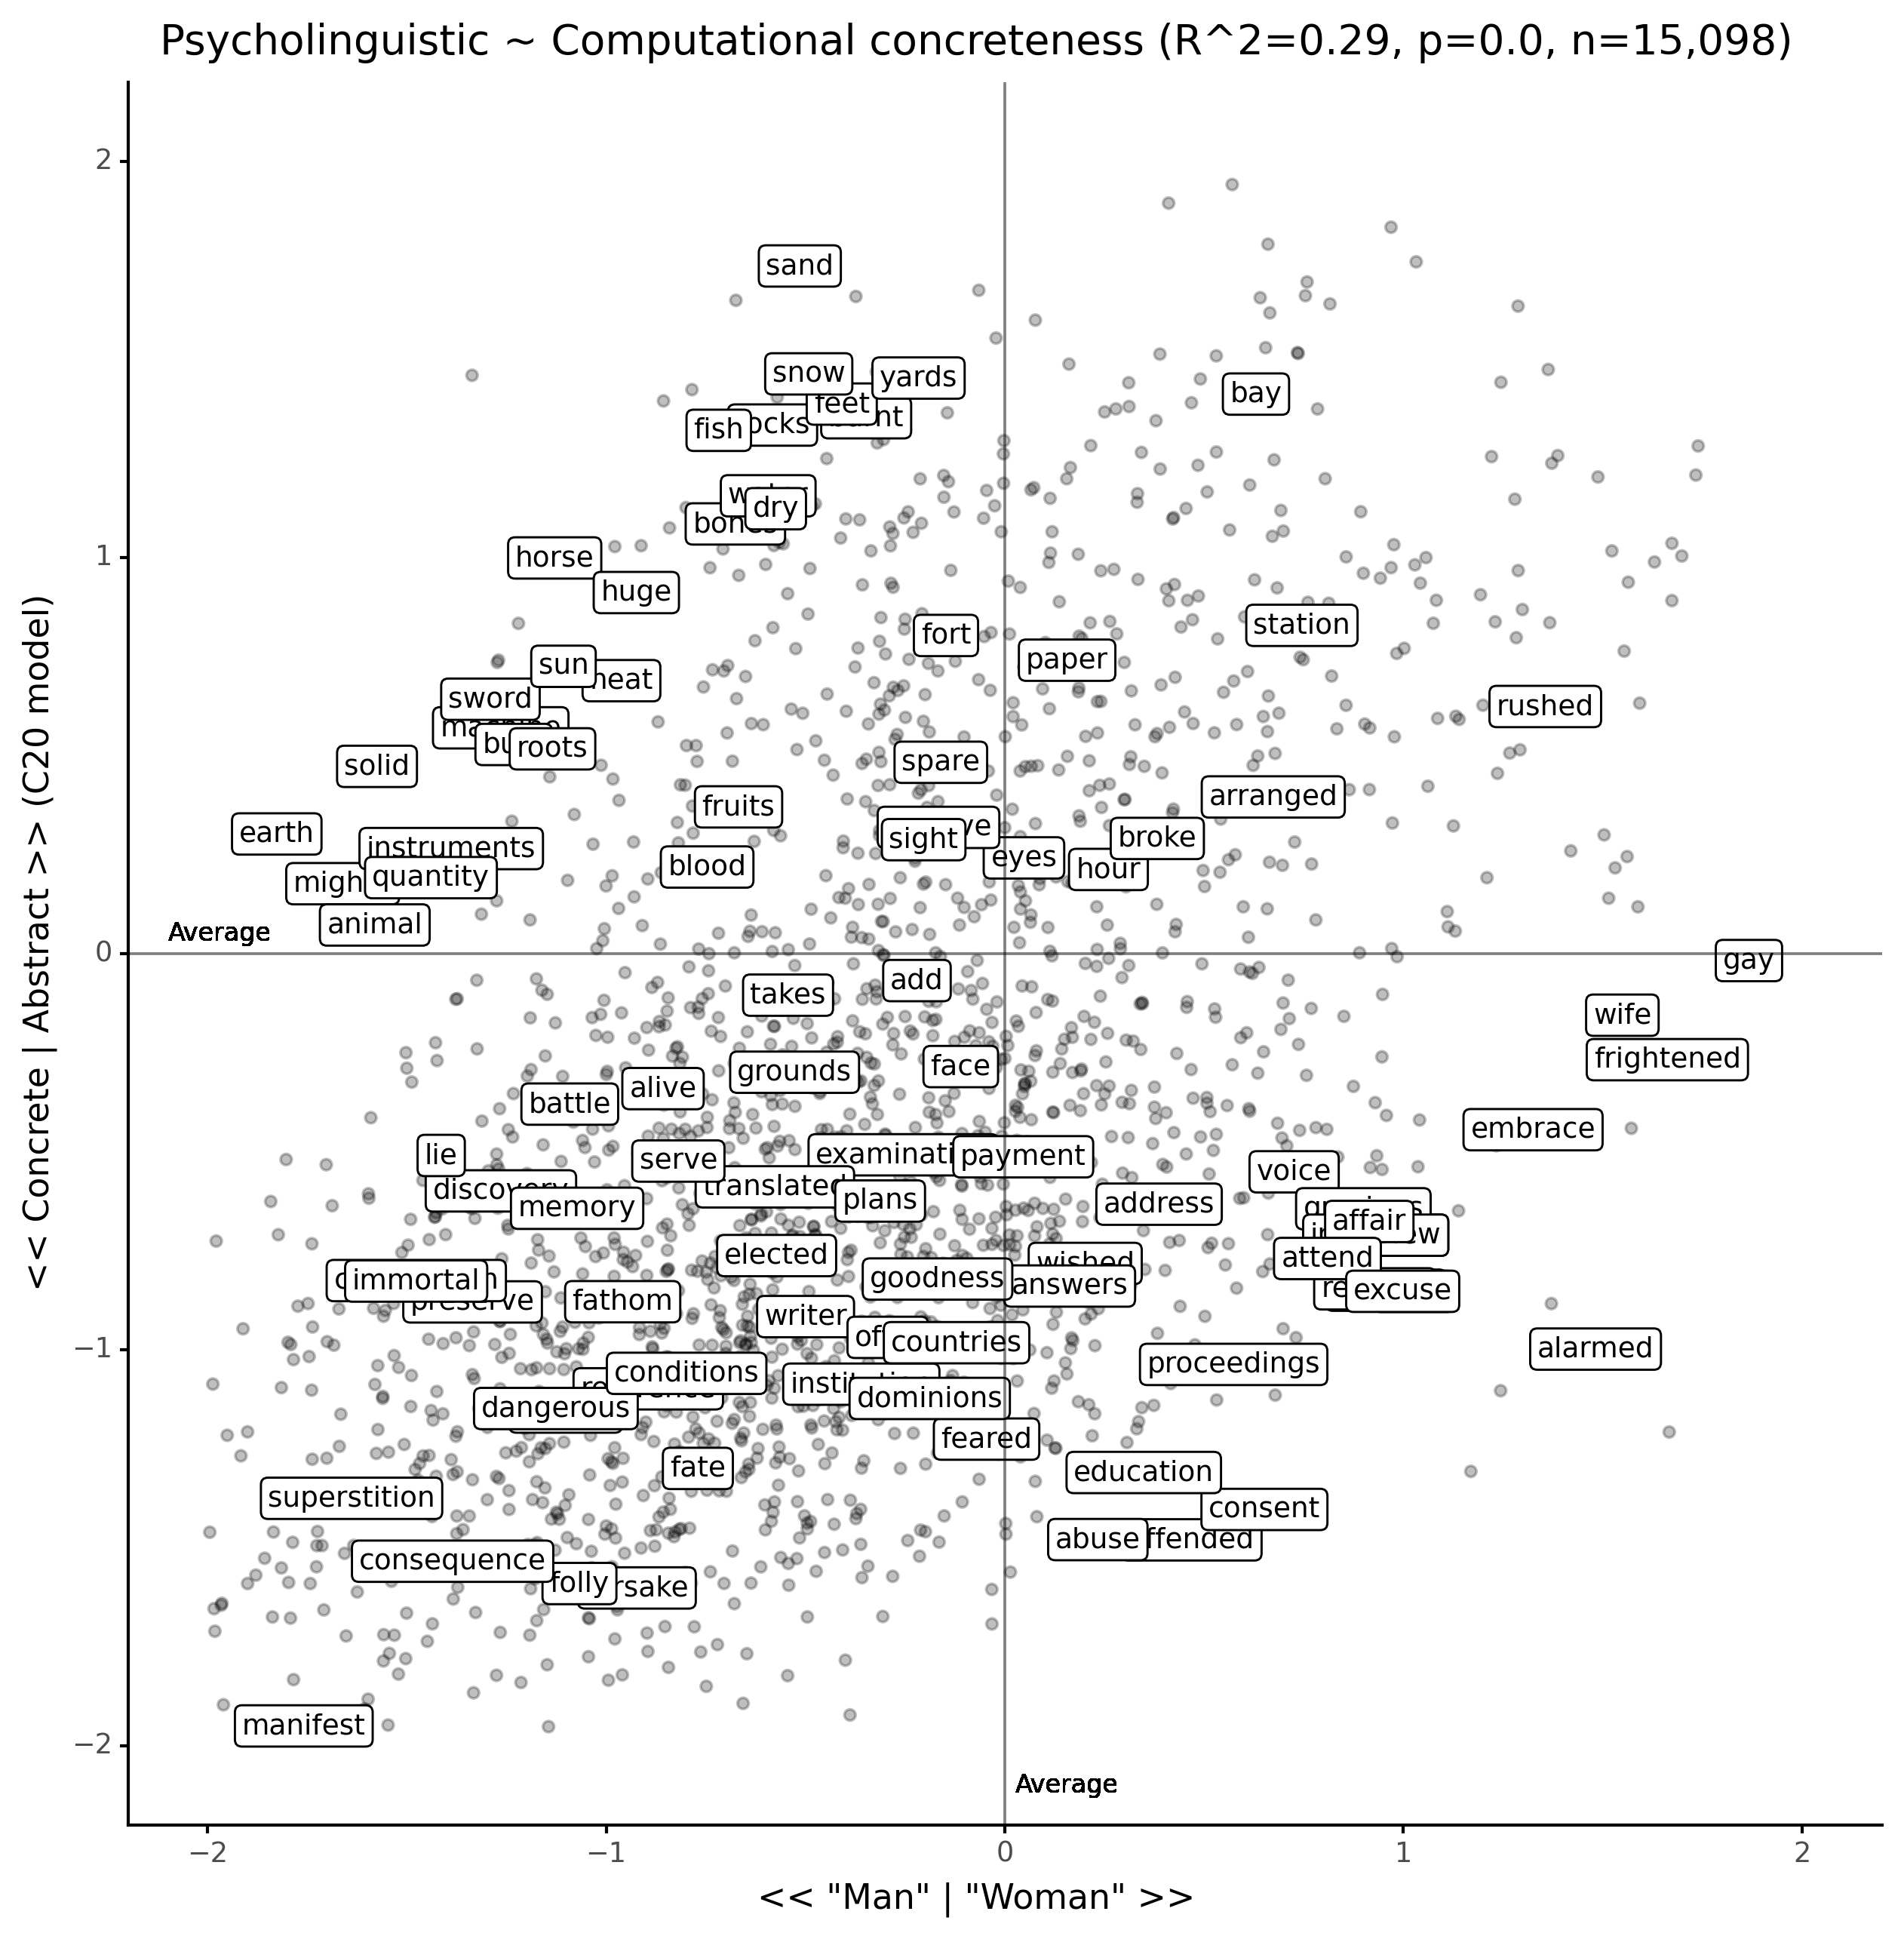

<ggplot: (8787699513317)>

In [31]:
fig=plot(figdf,x=x,y=y,n=2000)
fig.save('../../figures/psych-v-comp-norms.v26.gender.png')
fig